# Synthetic Histograms

In [3]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue
from optimization import ModelQuantumMap, Logger
from quantum_channel import ReplacementChannel, channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader
from experimental import generate_pauli_circuits

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [23]:
def homogeneous_data(n, N=None):
    d = 2**n
    inputs, _ = generate_pauli_circuits(n = n,
                                        N = N, 
                                        circuit_target=None)

    targets = tf.cast(np.ones((inputs[0].shape[0], d)), dtype = tf.complex128)/d
    
    return inputs, targets

def uniform_data(n, N=None):
    d = 2**n
    inputs, _ = generate_pauli_circuits(n = n,
                                        N = N, 
                                        circuit_target=None)
    N = inputs[0].shape[0]
    targets = np.random.uniform(0, 1, (N,d))
    targets = targets/np.sum(targets, axis=1).reshape(-1, 1)
    targets = tf.cast(targets, dtype = tf.complex128)
    
    return inputs, targets


## Homogeneous Probabilities

In [27]:
n = 3
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, targets = homogeneous_data(n)
channel_target = ReplacementChannel(d=d)

In [28]:
model = ModelQuantumMap(channel = KrausMap(d=d,
                                           rank=d**2,),
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

In [29]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.013288286129880882 -inf
0.0015453017146072386 -inf
0.0007338136760280432 -inf
0.00039500453552314434 -inf
0.00022995439219415236 -inf
0.0001475368410849973 -inf
6.5651525832253e-05 -inf
2.7293592581716438e-05 -inf
8.2427751463016e-06 -inf
2.5397393705643847e-06 -inf
5.720141586631642e-07 -inf


c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


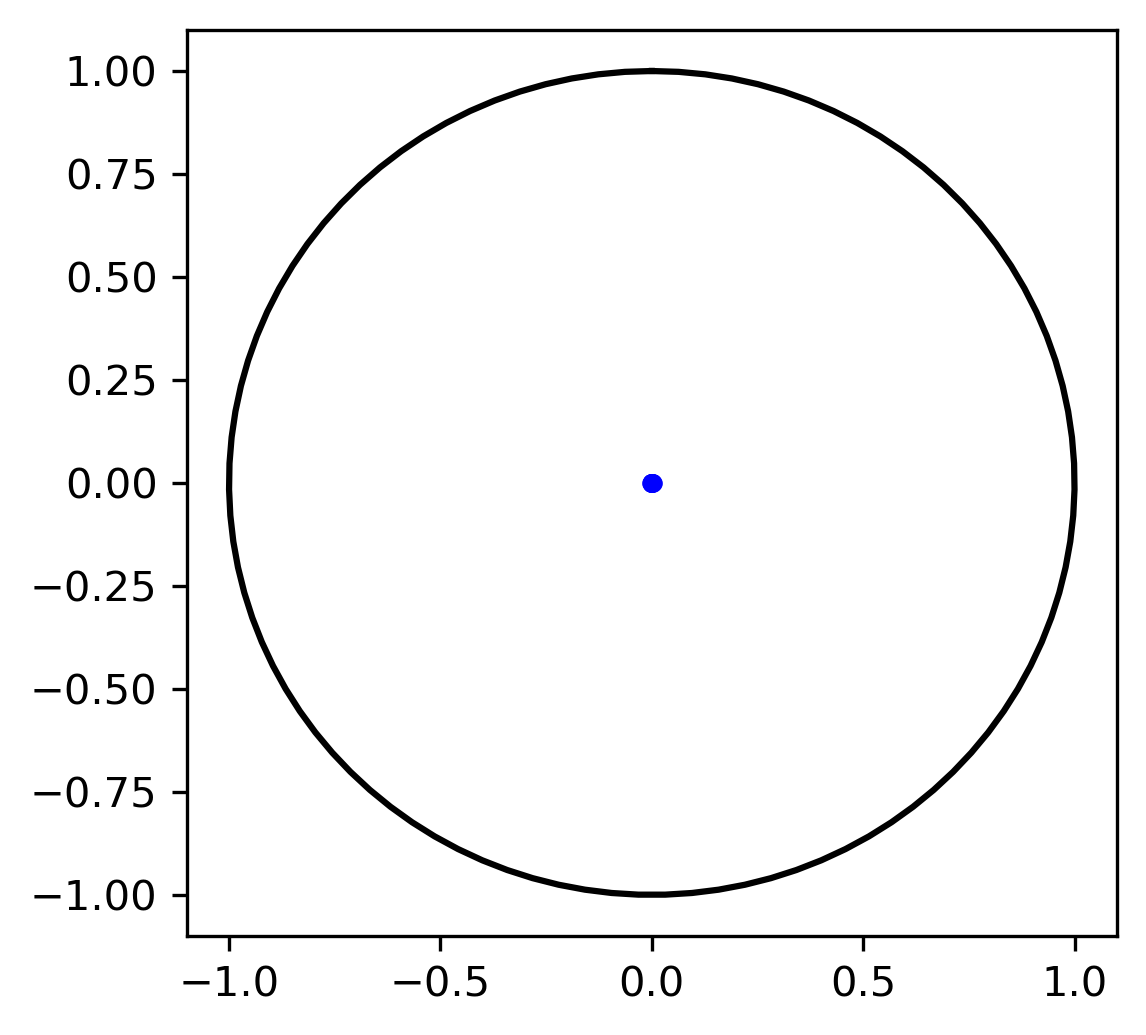

In [30]:
spectrum_model = channel_spectrum(model.channel, keep_unity=False)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*circle, "k")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize=3)
plt.show()

## Uniform Probabilities

In [24]:
n = 2
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, targets = uniform_data(n)


# define model
model_2q = ModelQuantumMap(channel = KrausMap(d=d,
                                           rank=d**2,),
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

# train model
model_2q.train(inputs = inputs, 
               targets = targets,
               inputs_val = inputs,
               targets_val = targets, 
               num_iter = 1000, 
               N = 500, 
               verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.3544173192002816 -0.15952729794179898
0.25832016247686207 0.15486838883452503
0.2512808139922295 0.17789863110957727
0.2507482313432931 0.17964105194060487
0.25068425802157895 0.1798503498751276
0.25067250625084836 0.17988879748539754
0.2506696387466804 0.17989817893822047
0.25066879214606924 0.1799009487140345
0.25066850209791425 0.17990189764834308
0.2506683933828315 0.17990225332539045
0.25066835178867053 0.17990238940667835


In [6]:
n = 3
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, targets = uniform_data(n)


# define model
model_3q = ModelQuantumMap(channel = KrausMap(d=d,
                                           rank=d**2,),
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

# train model
model_3q.train(inputs = inputs, 
               targets = targets,
               inputs_val = inputs,
               targets_val = targets, 
               num_iter = 1000, 
               N = 500, 
               verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.5446442250570446 -0.02492709699771045
0.4821224682570004 0.019724647698698528
0.5083628751927569 0.036347781976328486
0.4976275065389442 0.045038425377616154
0.4874924296032472 0.05024430673853886
0.4795739557450772 0.053578401978899404
0.4899499585184332 0.055340457297087586
0.49656493292123594 0.05692869418650881
0.46593193035144664 0.05785412656706734
0.4913387245673124 0.058596852614666295
0.479159927538431 0.05897641056443392


# Four Qubits

In [8]:
n = 4
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, targets = uniform_data(n, 10000)


# define model
model_4q = ModelQuantumMap(channel = KrausMap(d=d,
                                           rank=d**2,),
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

# train model
model_4q.train(inputs = inputs, 
               targets = targets,
               inputs_val = inputs,
               targets_val = targets, 
               num_iter = 1000, 
               N = 500, 
               verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.5412174901551179 -0.007083714660767182
0.5087785715247543 0.02725643223207852
0.5107872836777919 0.04969391390815481
0.5106524201106702 0.06484159873926942
0.49686546001670345 0.07518692409305094
0.5106698644924103 0.08239798540096088
0.49702844205913377 0.08746401606002985
0.49287880378774046 0.0911304021320688
0.4865724603714881 0.09379430603471128
0.4978085284553247 0.09588281480277061
0.4766608197161329 0.09736288908186252


In [13]:
model_4q.train(inputs = inputs, 
               targets = targets,
               inputs_val = inputs,
               targets_val = targets, 
               num_iter = 1000, 
               N = 500, 
               verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.4845895611396579 0.09737458521043418
0.5024647851794243 0.09861232243639984
0.4796545191191777 0.09945028014558177
0.49392952103331506 0.10029446854921997
0.48999362017722625 0.10088192809624841
0.4841954220038176 0.10136533854714691
0.48300081886456403 0.10166182597782958
0.4935587295913057 0.10207061428266839
0.4877795031510701 0.1023009128906307
0.49113008623641746 0.10256804487137183
0.47945502591367717 0.10275133454028207


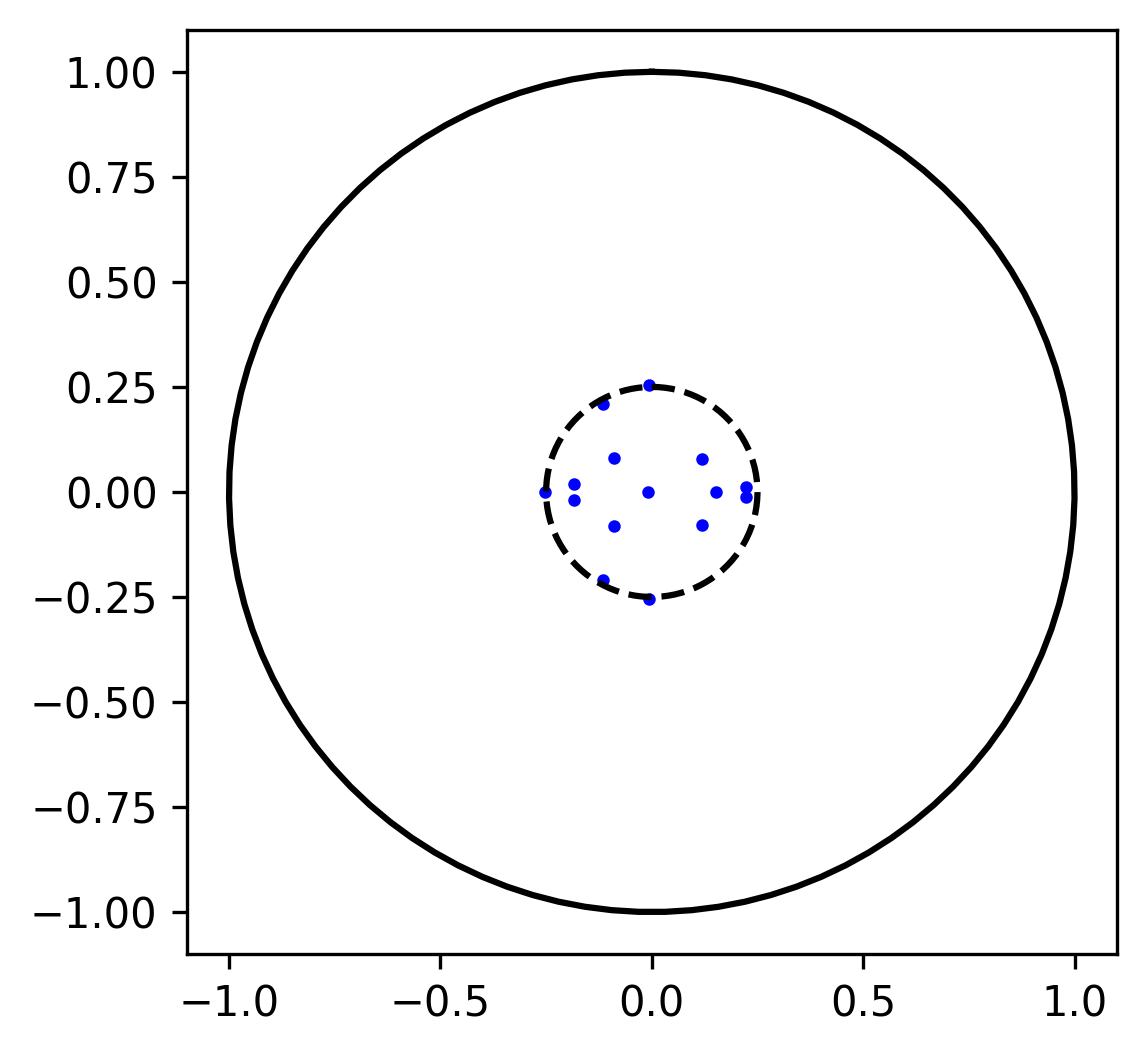

In [14]:
spectrum_model_2q = channel_spectrum(model_2q.channel, keep_unity=False)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
circle1 = 1/2**2*np.array([np.sin(t), np.cos(t)])

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*circle, "k")
plt.plot(spectrum_model_2q[:,0], spectrum_model_2q[:,1], "bo", markersize=2)
plt.plot(*circle1, "k--", markersize=2)
plt.show()

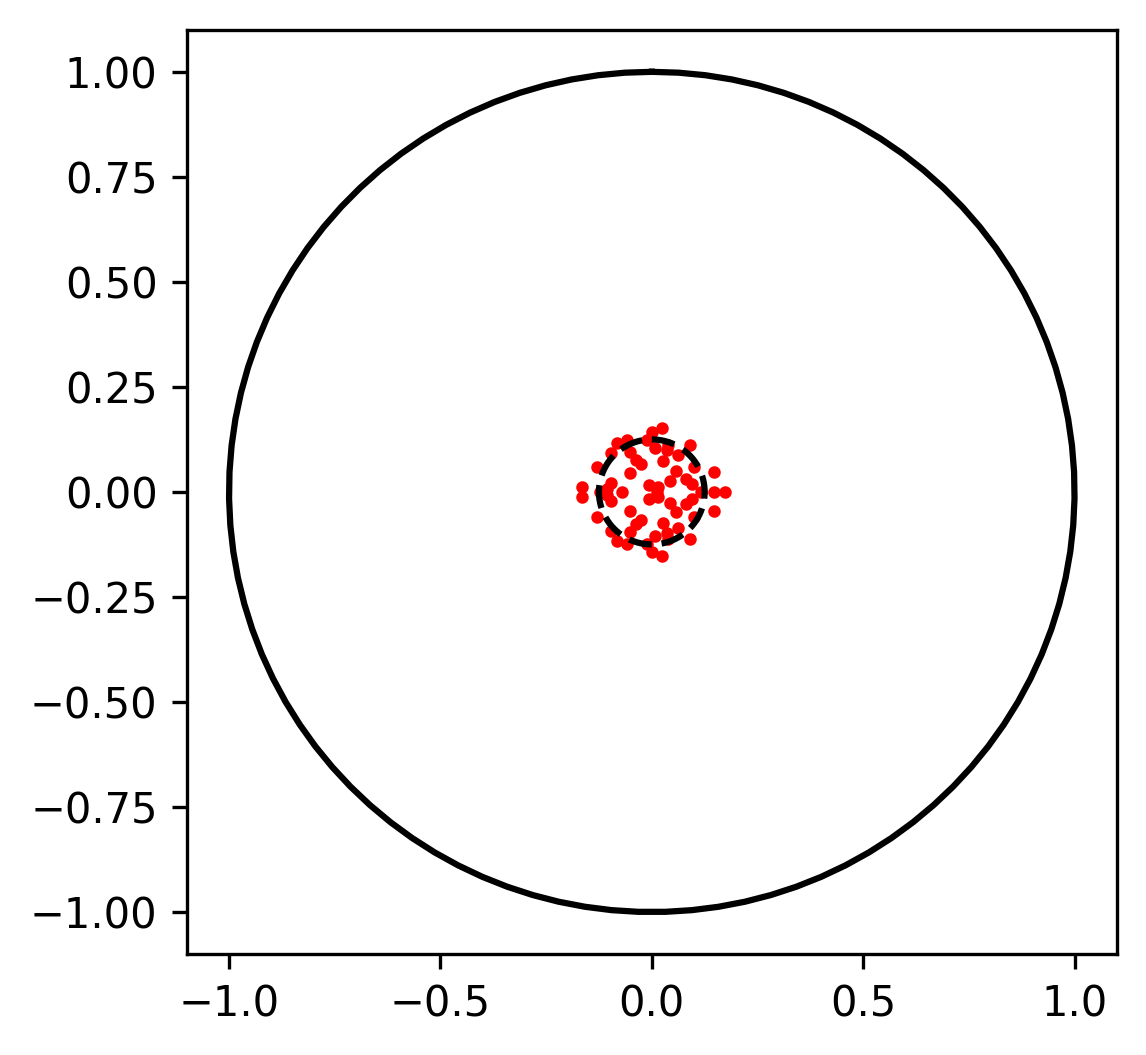

In [17]:
spectrum_model_3q = channel_spectrum(model_3q.channel, keep_unity=False)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
circle1 = 1/2**3*np.array([np.sin(t), np.cos(t)])

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*circle, "k")
plt.plot(spectrum_model_3q[:,0], spectrum_model_3q[:,1], "ro", markersize=2)
plt.plot(*circle1, "k--", markersize=2)
plt.show()

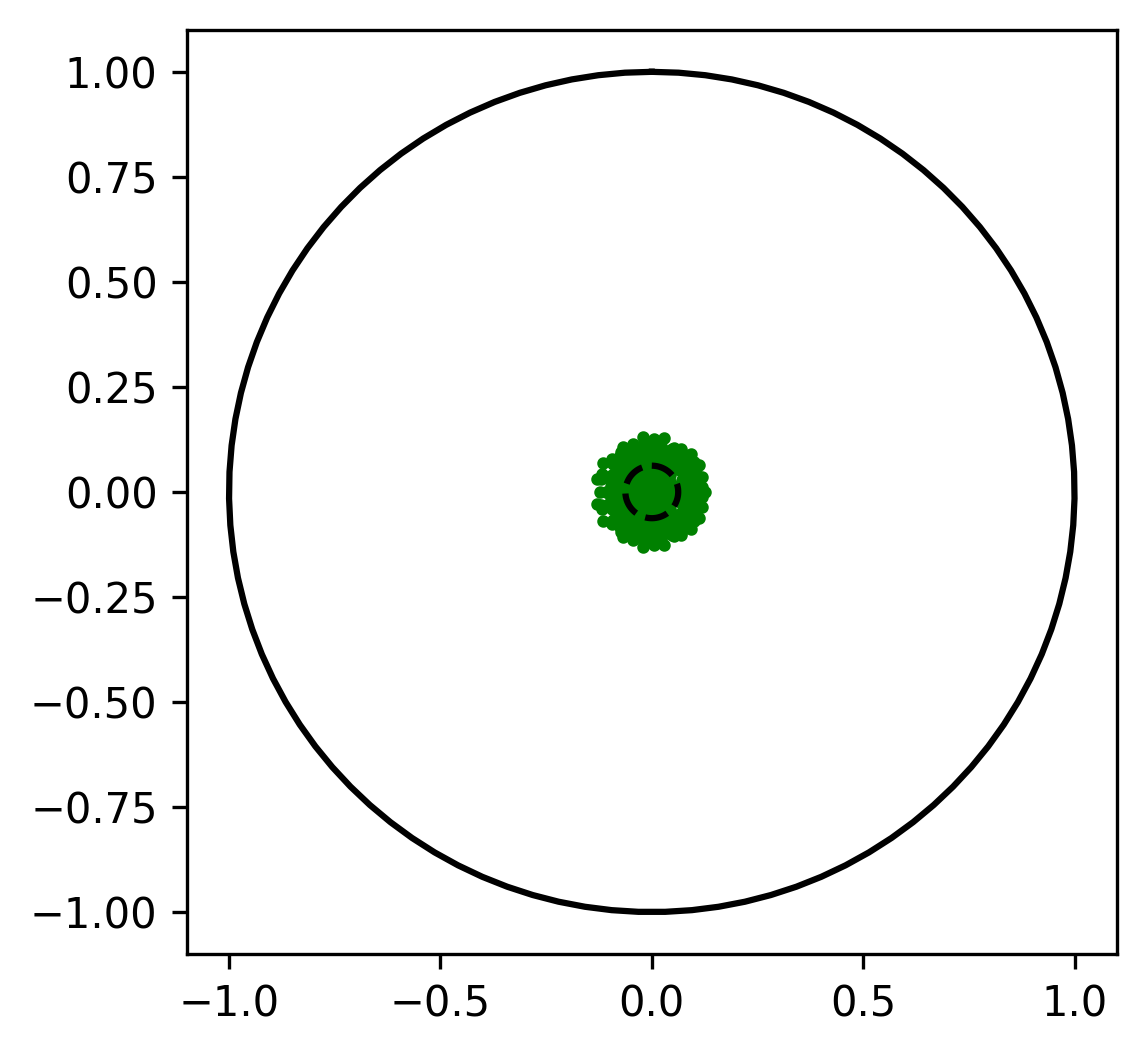

In [18]:
spectrum_model_4q = channel_spectrum(model_4q.channel, keep_unity=False)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
circle1 = 1/2**4*np.array([np.sin(t), np.cos(t)])

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*circle, "k")
plt.plot(spectrum_model_4q[:,0], spectrum_model_4q[:,1], "go", markersize=2)
plt.plot(*circle1, "k--", markersize=2)
plt.show()

In [21]:
model_4q_untrained = ModelQuantumMap(channel = KrausMap(d=d,
                                           rank=d**2,),
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


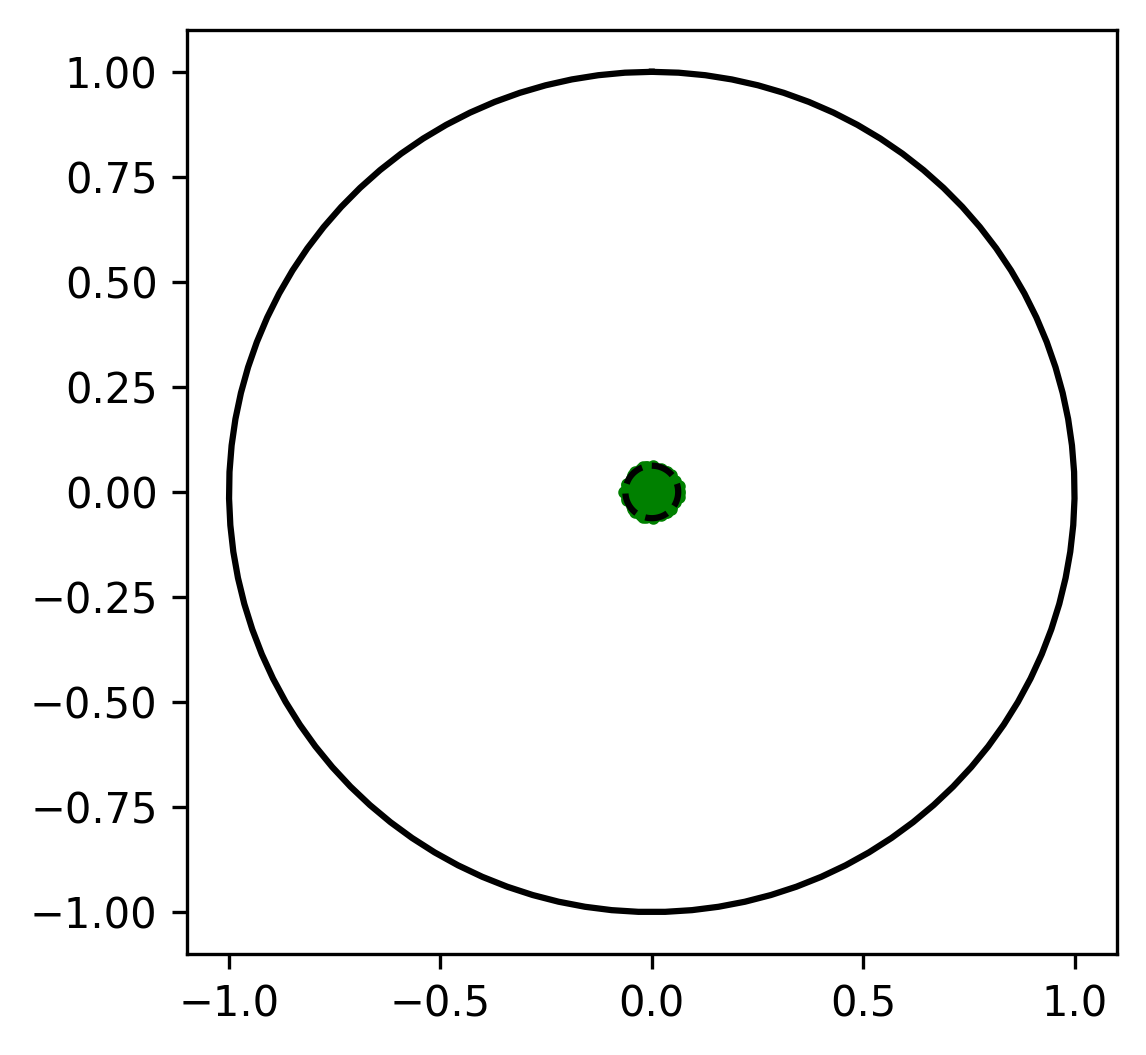

In [22]:
spectrum_model_4q = channel_spectrum(model_4q_untrained.channel, keep_unity=False)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
circle1 = 1/2**4*np.array([np.sin(t), np.cos(t)])

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*circle, "k")
plt.plot(spectrum_model_4q[:,0], spectrum_model_4q[:,1], "go", markersize=2)
plt.plot(*circle1, "k--", markersize=2)
plt.show()